## Analysis: Amazon purchase history ##

_Import libraries and packages_

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import path

_Import data_

In [81]:
path = '/Users/paulraymond/Documents/amazon_items.xlsx'
reader = open(path)

In [82]:
df = pd.read_excel(path)

In [83]:
df.tail()

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
362,2019-04-19,113-4431164-5334627,Sea to Summit Travelling Light Hanging Toiletr...,Sports,B00D8TYC4U,49000000.0,Amazon.com,NaT,new,luichel,...,AMZN_US(TBA077598729000),34.05,0.00,34.05,NaN,NaN,NaN,p ray,USD,NaN
363,2019-04-19,113-4431164-5334627,"Moleskine Cahier Soft Cover Journal, Set of 3,...",Paperback,8883704894,14111500.0,Amazon.com,2016-01-08,new,Amazon.com,...,AMZN_US(TBA073599201000),9.75,0.68,10.43,NaN,NaN,NaN,p ray,USD,NaN
364,2019-04-22,113-5455473-0764215,Typing Instructor Platinum 21 - Mac [Mac Downl...,Software Download,B07L69TS4L,43230000.0,Amazon.com,2018-11-15,new,Amazon Digital Services LLC,...,NaN,29.99,0.00,29.99,NaN,NaN,NaN,p ray,USD,NaN
365,2019-07-16,111-7969991-8532253,Wave,Paperback,345804317,55101500.0,Amazon.com,2013-12-31,new,Amazon.com,...,USPS(9341989677090067084922),12.00,0.35,12.35,NaN,NaN,NaN,p ray,USD,NaN
366,2019-07-16,111-7969991-8532253,H Is for Hawk,Paperback,802124739,55101500.0,Amazon.com,NaT,new,Amazon.com,...,USPS(9341989677090067084922),5.22,0.15,5.37,NaN,NaN,NaN,p ray,USD,NaN


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 36 columns):
Order Date                        367 non-null datetime64[ns]
Order ID                          367 non-null object
Title                             367 non-null object
Category                          346 non-null object
ASIN/ISBN                         367 non-null object
UNSPSC Code                       351 non-null float64
Website                           367 non-null object
Release Date                      143 non-null datetime64[ns]
Condition                         359 non-null object
Seller                            363 non-null object
Seller Credentials                0 non-null float64
List Price Per Unit               367 non-null float64
Purchase Price Per Unit           367 non-null float64
Quantity                          367 non-null int64
Payment Instrument Type           367 non-null object
Purchase Order Number             0 non-null float64
PO Line Number 

In [85]:
df.columns

Index(['Order Date', 'Order ID', 'Title', 'Category', 'ASIN/ISBN',
       'UNSPSC Code', 'Website', 'Release Date', 'Condition', 'Seller',
       'Seller Credentials', 'List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity', 'Payment Instrument Type', 'Purchase Order Number',
       'PO Line Number', 'Ordering Customer Email', 'Shipment Date',
       'Shipping Address Name', 'Shipping Address Street 1',
       'Shipping Address Street 2', 'Shipping Address City',
       'Shipping Address State', 'Shipping Address Zip', 'Order Status',
       'Carrier Name & Tracking Number', 'Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied', 'Tax Exemption Type',
       'Exemption Opt-Out', 'Buyer Name', 'Currency', 'Group Name'],
      dtype='object')

In [86]:
num_cols = ['List Price Per Unit', 'Purchase Price Per Unit',
       'Quantity','Item Subtotal', 'Item Subtotal Tax',
       'Item Total', 'Tax Exemption Applied']

In [87]:
# for col in num_cols:
#     df[col] = df[col][:126].replace('[\$]', '', regex=True).astype(float)
   

In [88]:
# df.info()

In [89]:
df.describe()

,UNSPSC Code,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Purchase Order Number,PO Line Number,Shipping Address Street 2,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Group Name
count,3.510000e+02,0.0,367.000000,367.000000,367.000000,0.0,0.0,0.0,367.000000,367.000000,367.000000,0.0,0.0,0.0,0.0
mean,5.149566e+07,NaN,45.717657,30.309619,1.079019,NaN,NaN,NaN,31.392343,0.927384,32.319728,NaN,NaN,NaN,NaN
std,6.810305e+06,NaN,144.230304,96.481383,0.508691,NaN,NaN,NaN,96.849330,2.945811,98.065982,NaN,NaN,NaN,NaN
min,1.411150e+07,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,5.018205e+07,NaN,9.990000,8.575000,1.000000,NaN,NaN,NaN,8.470000,0.000000,8.545000,NaN,NaN,NaN,NaN
50%,5.313160e+07,NaN,19.950000,13.460000,1.000000,NaN,NaN,NaN,13.890000,0.000000,14.140000,NaN,NaN,NaN,NaN
75%,5.510150e+07,NaN,30.000000,22.105000,1.000000,NaN,NaN,NaN,24.970000,0.810000,26.085000,NaN,NaN,NaN,NaN
max,6.415150e+07,NaN,1699.990000,1631.000000,8.000000,NaN,NaN,NaN,1631.000000,32.320000,1631.000000,NaN,NaN,NaN,NaN


In [92]:
df['Item Subtotal'].median()

13.89

In [100]:
np.sum([df['Item Subtotal'] == 0.0])

3

In [104]:
len(df['Quantity'])

367

In [105]:
for col in num_cols:
    total = sum(df[col])
    print("Total during period for {} was {}".format(col, total))

Total during period for List Price Per Unit was 16778.379999999986
Total during period for Purchase Price Per Unit was 11123.62999999998
Total during period for Quantity was 396
Total during period for Item Subtotal was 11520.989999999978
Total during period for Item Subtotal Tax was 340.3500000000002
Total during period for Item Total was 11861.33999999999
Total during period for Tax Exemption Applied was nan


In [107]:
# percent of list price paid

sum(df['Purchase Price Per Unit']) / sum(df['List Price Per Unit'])

0.6629740177537992

In [122]:
# df.Category

In [119]:
books_df = df[(df['Category'] == 'Paperback') | (df['Category'] == 'Hardcover')]

In [144]:
books_df.head()

,Order Date,Order ID,Title,Category,ASIN/ISBN,UNSPSC Code,Website,Release Date,Condition,Seller,...,Carrier Name & Tracking Number,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Buyer Name,Currency,Group Name
2,2009-01-19,104-1526467-5993047,The Purpose Driven√Ç¬Æ Life: What on Earth Am ...,Paperback,310276993,55101500.0,Amazon.com,2007-03-13,NaN,Amazon.com,...,UPS(1Z411E0W0360073406),10.19,0.0,10.19,NaN,NaN,NaN,p ray,USD,NaN
4,2009-01-19,104-1526467-5993047,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1Z411E0W0360073406),39.96,0.0,39.96,NaN,NaN,NaN,p ray,USD,NaN
5,2009-01-19,104-9391554-5689007,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1ZA41W190331427257),39.96,0.0,39.96,NaN,NaN,NaN,p ray,USD,NaN
6,2009-01-19,104-5536992-5305026,The Purpose-Driven Life Journal,Hardcover,310803063,55101500.0,Amazon.com,2002-11-10,NaN,Amazon.com,...,UPS(1Z8E26R80393587708),79.92,0.0,79.92,NaN,NaN,NaN,p ray,USD,NaN
10,2010-01-04,002-4388174-7824228,Le Petit Prince (French Language Edition),Paperback,156013983,55101500.0,Amazon.com,2001-09-04,new,Amazon.com,...,USPS(9102901001301193739395),7.92,0.0,7.92,NaN,NaN,NaN,p ray,USD,NaN


In [145]:
books_df.describe()

,UNSPSC Code,Seller Credentials,List Price Per Unit,Purchase Price Per Unit,Quantity,Purchase Order Number,PO Line Number,Shipping Address Street 2,Item Subtotal,Item Subtotal Tax,Item Total,Tax Exemption Applied,Tax Exemption Type,Exemption Opt-Out,Group Name
count,1.100000e+02,0.0,110.000000,110.000000,110.000000,0.0,0.0,0.0,110.000000,110.000000,110.000000,0.0,0.0,0.0,0.0
mean,5.472886e+07,NaN,19.308364,11.868455,1.127273,NaN,NaN,NaN,13.293818,0.449091,13.742909,NaN,NaN,NaN,NaN
std,3.908243e+06,NaN,30.765247,6.145576,0.791110,NaN,NaN,NaN,10.172245,0.595049,10.382687,NaN,NaN,NaN,NaN
min,1.411150e+07,NaN,0.000000,0.290000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,5.510150e+07,NaN,10.230000,7.927500,1.000000,NaN,NaN,NaN,7.905000,0.000000,7.905000,NaN,NaN,NaN,NaN
50%,5.510150e+07,NaN,16.995000,11.535000,1.000000,NaN,NaN,NaN,11.660000,0.000000,12.360000,NaN,NaN,NaN,NaN
75%,5.510150e+07,NaN,21.990000,14.995000,1.000000,NaN,NaN,NaN,15.192500,0.847500,16.185000,NaN,NaN,NaN,NaN
max,5.510150e+07,NaN,324.950000,39.790000,8.000000,NaN,NaN,NaN,79.920000,2.540000,79.920000,NaN,NaN,NaN,NaN


In [125]:
# Number of book orders
len(books_df)

110

In [141]:
# total books purchased
sum(books_df.Quantity)

124

In [143]:
#median price
np.median(books_df['Purchase Price Per Unit'])

11.535

In [121]:
# percent of orders that are books
len(books_df) / len(df)

0.2997275204359673

In [124]:
# percent spent on books

sum(books_df['Purchase Price Per Unit']) / sum(df['Purchase Price Per Unit'])

0.1173654643313381

In [140]:
sum(books_df['Purchase Price Per Unit']) / sum(books_df['List Price Per Unit'])

0.6146794606199856

In [126]:
for entry in books_df.Title:
    print(entry)

The Purpose Driven√Ç¬Æ Life: What on Earth Am I Here For? (Purpose Driven√Ç¬Æ Life, The)
The Purpose-Driven Life Journal
The Purpose-Driven Life Journal
The Purpose-Driven Life Journal
Le Petit Prince (French Language Edition)
The Reason for God: Belief in an Age of Skepticism
Les Miserables (Petits Classiques Larousse) (French Edition)
Charlie Et La Chocolaterie (French Edition)
The Count of Monte Cristo (Oxford World's Classics)
Holy Bible - New International Version
Larousse French English Dictionary Canadian Edition
Je t'aimerai toujours (French Edition)
Larousse French English Dictionary Canadian Edition
The Sudoku Challenge: 200 Puzzles to Strain Your Brain!
The Official SAT Study Guide: For the New SAT
My Best Mathematical and Logic Puzzles (Dover Recreational Math)
The Official Guide for GMAT Quantitative Review, 2nd Edition
Kaplan GMAT Verbal Foundations
The Official SAT Study Guide, 2nd edition
The Real ACT (CD) 3rd Edition (Real Act Prep Guide)
The Official Guide for GMAT Ve

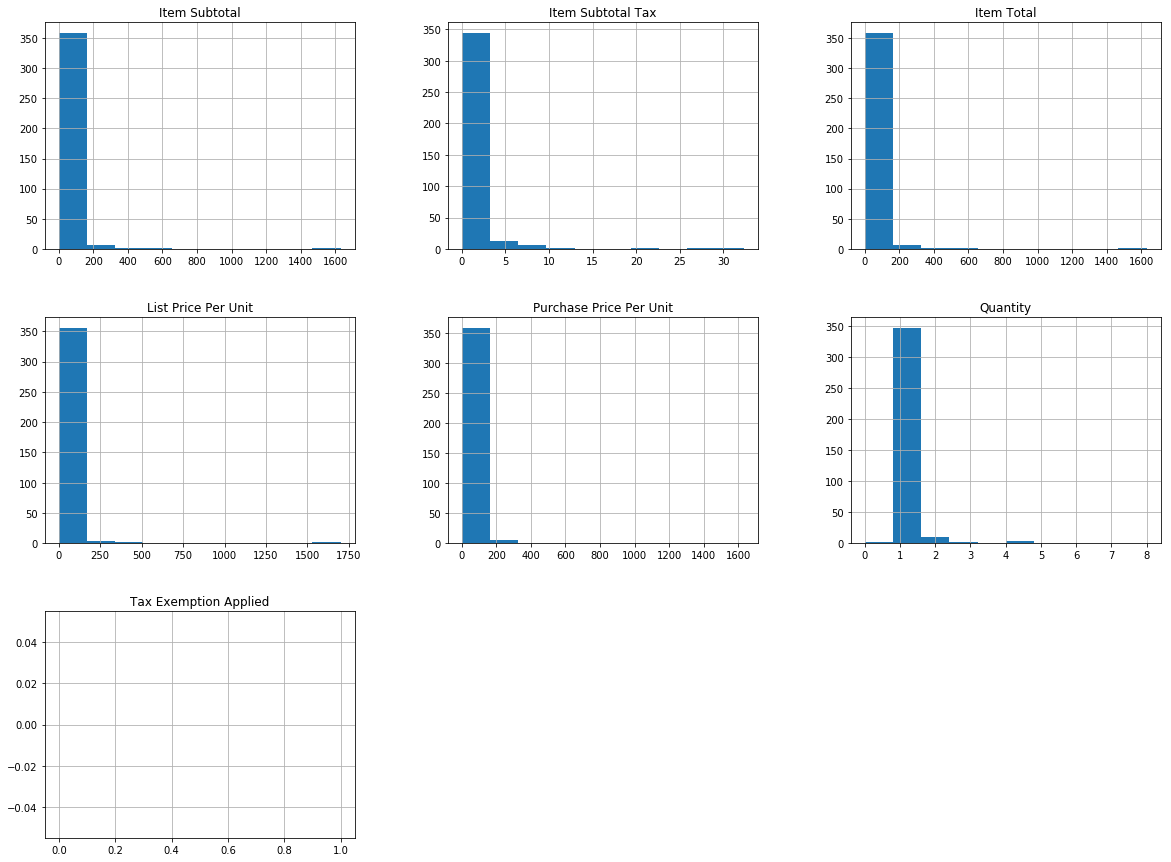

In [139]:
df[num_cols].hist(figsize=(20,15))
plt.show()

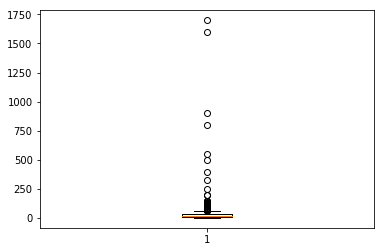

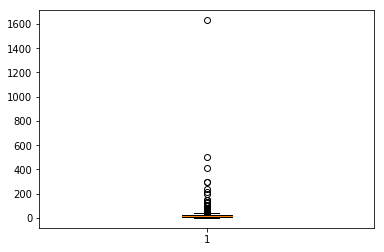

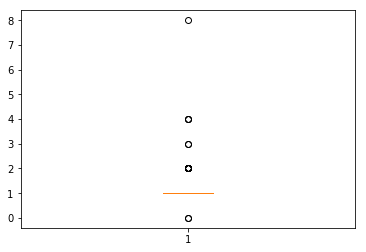

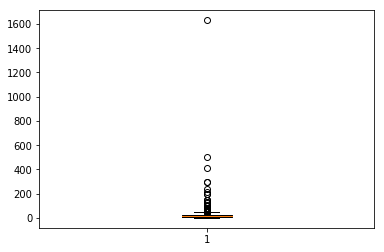

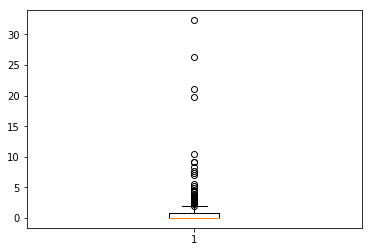

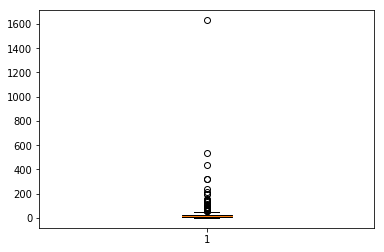

/Users/paulraymond/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/paulraymond/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


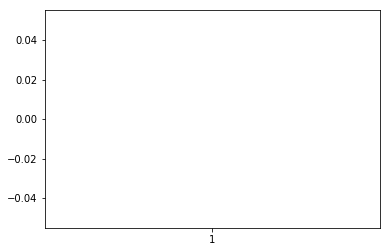

In [137]:
for col in num_cols:
    plt.boxplot(df[col])
    plt.show()